# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [1]:
import numpy as np
import pandas as pd

! git clone https://github.com/AngelikaBaloy/scratchpad
%run ./scratchpad/get_data.py

airbnb = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='latin-1')
airbnb.head()

Cloning into 'scratchpad'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 55 (delta 14), reused 7 (delta 7), pack-reused 34 (from 1)
Receiving objects: 100% (55/55), 737.13 KiB | 3.15 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Download complete
Extracting data files...
Data extracted


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [2]:
# 1 ) cleaning Price
airbnb.dtypes # price as object
airbnb['Price'].unique() # commas and stuff
airbnb['Price'] = airbnb['Price'].str.replace(',' , '')
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

In [3]:
airbnb['Price'].unique() # commas gone
airbnb['Price'].describe()

airbnb['Price_NA'] = airbnb['Price'].isna()
airbnb['Price_NA'].value_counts() # there are no missing values?


,count
Price_NA,
False,30478


In [4]:
# 2 ) cleaning subject_injury
mn_police = pd.read_csv('/content/data/mn_police_use_of_force.csv')
mn_police.head()

mn_police['injury_na'] = mn_police['subject_injury'].isna()
mn_police['injury_na'].value_counts() # 9849 na=True
len(mn_police) # 9849 out of 12925 are missing



12925

In [5]:
pd.crosstab(mn_police['subject_injury'], mn_police['force_type'], dropna=True) # crosstab dropna


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


In [6]:
mn_police['subject_injury'] = mn_police['subject_injury'].fillna('Missing') # replacing NA with Missing
mn_police['subject_injury'].value_counts()


,count
subject_injury,
Missing,9848
Yes,1631
No,1446


In [7]:
pd.crosstab(mn_police['subject_injury'], mn_police['force_type']) # new crosstab with Missing
# it seems that bodily force is their preferred force type; a large proportion of the missing
# subject_injury cases involved bodily force, but the same goes for No/Yes as well

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [8]:
# 3 ) dummy var
metabric = pd.read_csv('/content/data/metabric.csv')

metabric['Overall Survival Status'] = metabric['Overall Survival Status'].replace(['0:LIVING'],1) # living = 1
metabric['Overall Survival Status'] = metabric['Overall Survival Status'].replace(['1:DECEASED', 0]) # dead = 0
metabric.head()

/tmp/ipython-input-2298631483.py:5: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  metabric['Overall Survival Status'] = metabric['Overall Survival Status'].replace(['1:DECEASED', 0]) # dead = 0


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,1,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,1,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1,YES,5.230071,31.0,4.0


In [9]:
# 4 ) missing values
airbnb['rating_na'] = airbnb['Review Scores Rating'].isna()
airbnb['rating_na'].value_counts() # 8323 missing ratings out of 30478
len(airbnb)

airbnb_med = airbnb['Review Scores Rating'].median() # median is 94
airbnb['Review Scores Rating'] = airbnb['Review Scores Rating'].fillna(airbnb_med) # na -> median
airbnb['Review Scores Rating'].value_counts()
# This might bias the results because a large amount of data has been replaced with the median
# This would be fine if a smaller proportion of the ratings were missing but a lot were

,count
Review Scores Rating,
94.0,9266
100.0,5594
90.0,1729
93.0,1614
80.0,1423
95.0,1295
96.0,1188
97.0,1033
92.0,875


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [11]:
# 1 ) opening file
shark_df = pd.read_excel('/content/GSAF5.xls')
shark_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# 2 ) drop col
shark_df.columns
shark_df = shark_df.drop(columns=['Unnamed: 21', 'Unnamed: 22'])

In [ ]:
# 3 )
# I would count an observation as a row with an available date/year and source.
# I think these are the most important pieces of information to verify that an attack
# actually happened. Having every piece of information is the best and the more the better,
# but I understand that not every observation will be complete.
# Where I draw the line will impact what rows are dropped, which will affect the analysis a great deal.
# Of course, I want to remove the less viable rows to make my analysis precise, but I don't want to
# remove too much either.

<Axes: >

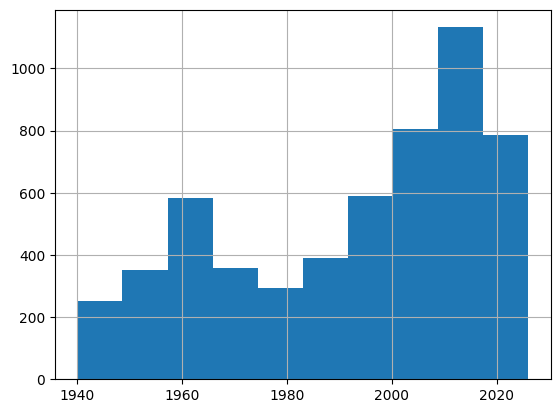

In [27]:
# 4 )
shark_df['Year'].unique() # .
shark_df.dtypes # year = float
shark_df['Year'].isna().value_counts() # year is missing for 2
shark_df['Year'].describe() # range: 0 to 2026

shark_df = shark_df.dropna(subset=['Year']) # dropping missing

# changing float to int
shark_df['Year'] = shark_df['Year'].astype(int)

shark_1940 = shark_df.loc[shark_df['Year'] >= 1940, :] # data from 1940 on

shark_1940['Year'].hist()
# shark attacks seem to have increased over time, but it is not a perfect positive linear trend

<Axes: >

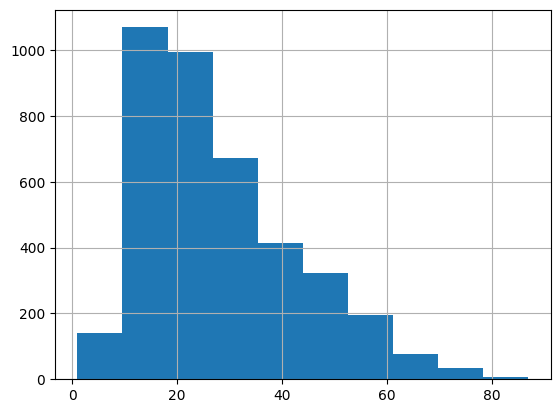

In [36]:
# 5 ) age
shark_df.dtypes # age is object :(
shark_df['Age'].unique() # wow ok... a lot going on here

shark_df['Age_new'] = pd.to_numeric(shark_df['Age'], errors='coerce')

shark_df['Age_new'].hist() # mostly teens and young adults

In [43]:
shark_df['Type'].value_counts()

,count
Type,
Unprovoked,5225
Provoked,644
Invalid,551
Watercraft,355
Sea Disaster,242
Questionable,26
Unknown,18
Boat,7
Unconfirmed,1


In [48]:
# 6 ) type
shark_df['Type'].unique()
shark_df['Type'].value_counts()

shark_df['Type']= shark_df['Type'].replace([' Provoked', 'Watercraft', 'Sea Disaster', 'Boat'], 'Provoked') # inclueded watercraft/boat/disaster because perhaps the shark was annoyed
shark_df['Type']= shark_df['Type'].replace(['unprovoked'], 'Unprovoked')
shark_df['Type']= shark_df['Type'].replace([np.nan, 'Questionable','Unverified','Under investigation', 'Invalid', '?', 'Unconfirmed'], 'Unknown')

shark_df['Type'].value_counts() # now only three types exist
# most attacks are unprovoked 5225/7072 (73.9%)


7072

In [52]:
# 7 ) fatal
shark_df['Fatal Y/N'].unique()

shark_df['Fatal Y/N']= shark_df['Fatal Y/N'].replace(['n', 'Nq', ' N', 'N '], 'N')
shark_df['Fatal Y/N']= shark_df['Fatal Y/N'].replace(['y', 'Y x 2'], 'Y')
shark_df['Fatal Y/N']= shark_df['Fatal Y/N'].replace(['F', 'M', np.nan, 2017, 'UNKNOWN'], 'Unknown')

shark_df['Fatal Y/N'].value_counts() # now only three types exist


,count
Fatal Y/N,
N,4943
Y,1489
Unknown,640


In [55]:
# 8 )

pd.crosstab(shark_df['Type'], shark_df['Fatal Y/N'])
# more likely to be fatal when attack is unprovoked
# fatality ratio when provoked is roughly 1:5
# fatality ratio when unprovoked is roughly 1:3


Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,1020,26,202
Unknown,43,536,20
Unprovoked,3880,78,1267


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?



1. Data tidying and how to approach it
2. The "tidy data standard" refers to the structure/organization of data that allows analysis to be easier. It is like a guideline for us to follow so we always have an idea of how to clean a dataset.
3. The first sentence means that tidy datasets have shared qualities that make them tidy, while what makes a dataset messy can be distinct and specific. The second sentence means that making sense of what the data is showing through its rows and columns can sometimes be unclear.
4. Values are usually numeric or strings that can be attributed to both a variable and an observation. Variables contain values for a specific attribute. Observations are all values associated with a specific unit.
5. Tidy data follows the framework where each variable forms a column, each observation forms a row, and each type of observational unit forms a table.
6. The five most common problems with messy datasets are the following: column headers are values, not variable names; multiple variables are stored in one column; variables are stored in both rows and columns; multiply types of observational units are stored in the same table; a single observational unit is stored in multiple tables. Table 4 is messy because the column names are values. Melting a dataset is the same as stacking it, or turning the columns into rows.
7. Table 11 is messy because it has variables in individual columns, spread across columns and across rows. Instead of having day as a variable, there are columns for each day of the month and most hold missing values. This is inefficient and does not abide by the tidy framework. The molten version fixes this issue by consolidating all of the day variables into values in a date column.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [2]:
# 1 ) load in
gifts = pd.read_csv('/content/data/ForeignGifts_edu.csv')
gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


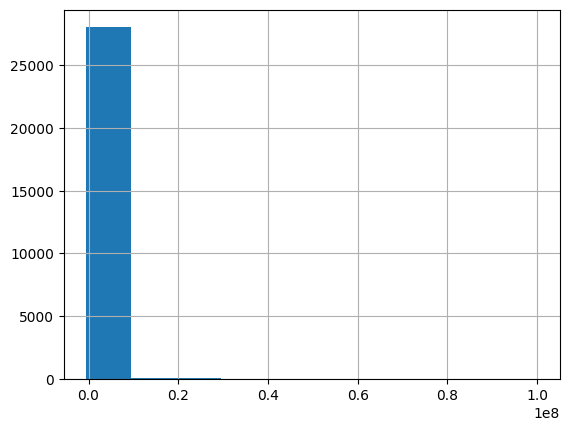

In [82]:
# 2 ) foreign gift amount hist

gifts['Foreign Gift Amount'].hist() # positive skew
gifts['Foreign Gift Amount'].describe()
# There's a negative gift amount for the min ; max is 100000000
# The median gift amount is 94615


,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


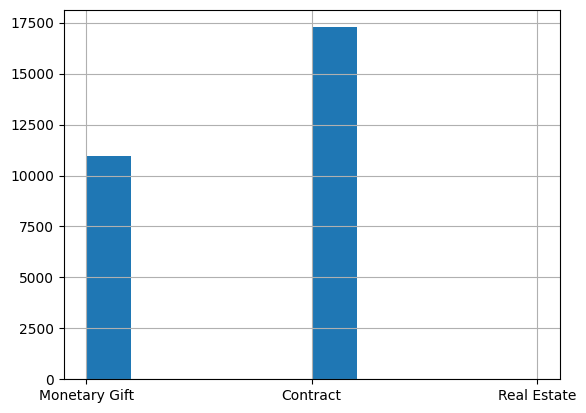

In [81]:
# 3 )
gifts['Gift Type'].hist() # most are contract, followed by monetary gift, few are real estate
gifts['Gift Type'].value_counts()

In [83]:
gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [85]:
# 4 )
gifts['Country of Giftor'].value_counts().head(15)
# top 15 in number of gifts

,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [88]:
gifts['Foreign Gift Amount'].groupby(gifts['Country of Giftor']).sum().sort_values(ascending=False).head(15)
# top 15 countries by amount given

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [14]:
# 5 ) institutions
gifts['Foreign Gift Amount'].groupby(gifts['Institution Name']).sum().sort_values(ascending=False).head(15)
# ^ top 15



,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


<Axes: >

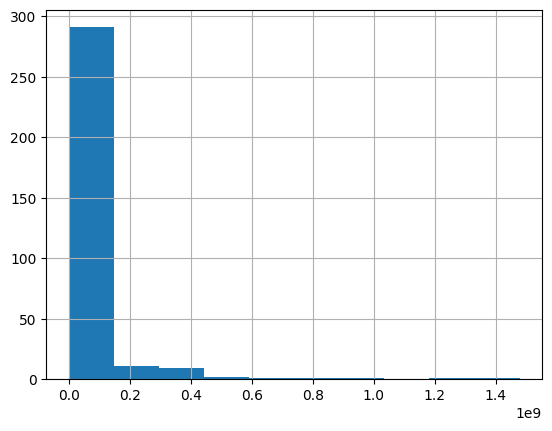

In [19]:
# 5 ) hist institutions (all)
inst = gifts['Foreign Gift Amount'].groupby(gifts['Institution Name']).sum()
inst.hist() # large spread, positive skew


In [20]:
# 6 ) top giftors
gifts['Foreign Gift Amount'].groupby(gifts['Giftor Name']).sum().sort_values(ascending=False).head()
# top 5 giftors

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [16]:
# 1 ) load
college = pd.read_csv('/content/data/college_completion.csv')

In [5]:
# 2 ) viewing
college.shape # 3798 observations, 63 variables
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [6]:
# 3 )
pd.crosstab(college['control'], college['level'])
# What sticks out is that the vast majority of private not-for-profit
# schools are 4-year level institutions, while private for-profit and public schools were more split
# between levels. The majority of those in the data set are 4-year level institutions regardless of control.


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


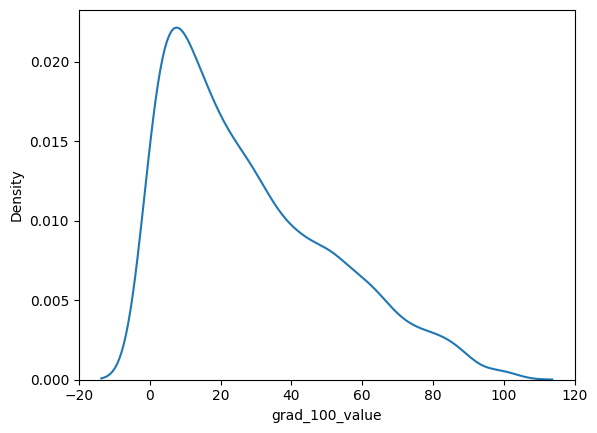

In [7]:
# 4 ) kde plots
import seaborn as sns
sns.kdeplot(college['grad_100_value'])
college['grad_100_value'].describe() # 0-100

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

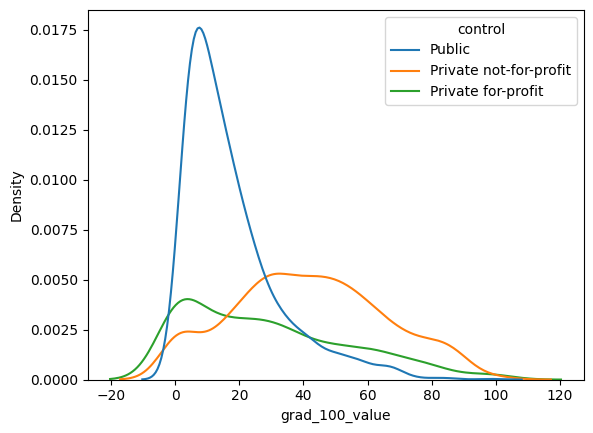

In [36]:
# 4 ) control
sns.kdeplot(x=college['grad_100_value'], hue= college['control'])
college.loc[:,['grad_100_value', 'control']].groupby('control').describe()
# private not-for-profit seems to have the best graduation rates

                grad_100_value     aid_value
grad_100_value      543.483382  8.861048e+04
aid_value         88610.483169  4.121201e+07
                grad_100_value  aid_value
grad_100_value        1.000000   0.575879
aid_value             0.575879   1.000000


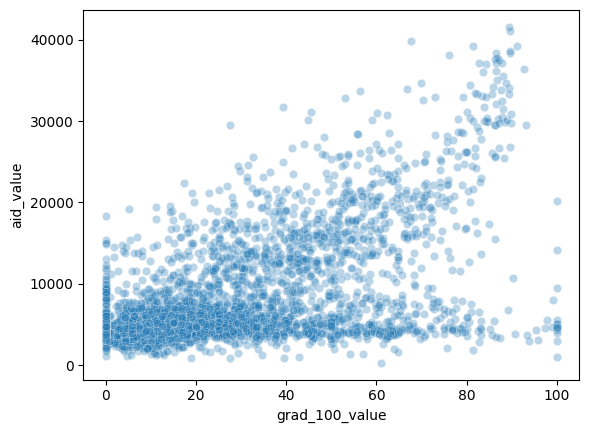

In [47]:
# 5 ) scatterplot
sns.scatterplot(x=college['grad_100_value'], y=college['aid_value'], alpha=.3)

print(college.loc[:,('grad_100_value', 'aid_value')].cov(numeric_only=True))
print(college.loc[:,('grad_100_value', 'aid_value')].corr(numeric_only=True))

# cov :
# grad_100_value and aid_value are positively related

# corr : 0.576
# grad_100_value and aid_value are positively correlated with moderate strength

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

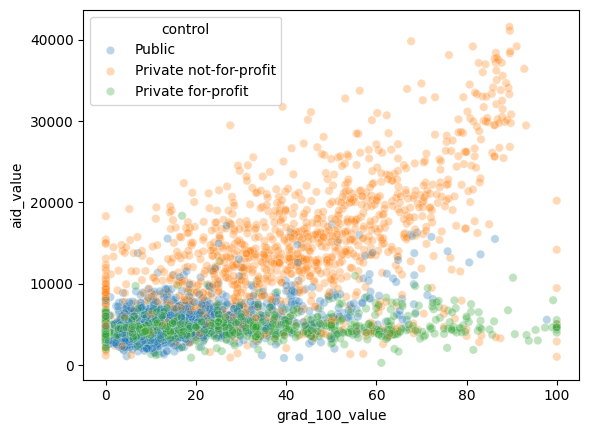

In [19]:
# 5 ) scatterplot but condition on control
sns.scatterplot(x=college['grad_100_value'], y=college['aid_value'], hue= college['control'], alpha=.3)



In [22]:
print(college.loc[:,['grad_100_value', 'aid_value', 'control']].groupby('control').cov())
college.loc[:,['grad_100_value', 'aid_value', 'control']].groupby('control').corr()

# The covariances seem to differ when dividing by control, but they are all positive.
# Private not-for-profit has the highest covariance

# The correlations all suggest a positive relationship, but private for-profit is noticeably weaker than
# the other two. Private not-for-profit institutions have the strongest correlation.


                                       grad_100_value     aid_value
control                                                            
Private for-profit     grad_100_value      655.446387  6.897525e+03
                       aid_value          6897.524957  1.957540e+06
Private not-for-profit grad_100_value      554.660462  1.092741e+05
                       aid_value        109274.123337  6.041488e+07
Public                 grad_100_value      216.956489  1.535515e+04
                       aid_value         15355.146212  4.564360e+06


grad_100_value  aid_value
control                                                         
Private for-profit     grad_100_value        1.000000   0.188363
                       aid_value             0.188363   1.000000
Private not-for-profit grad_100_value        1.000000   0.601591
                       aid_value             0.601591   1.000000
Public                 grad_100_value        1.000000   0.482481
                       aid_value             0.482481   1.000000

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

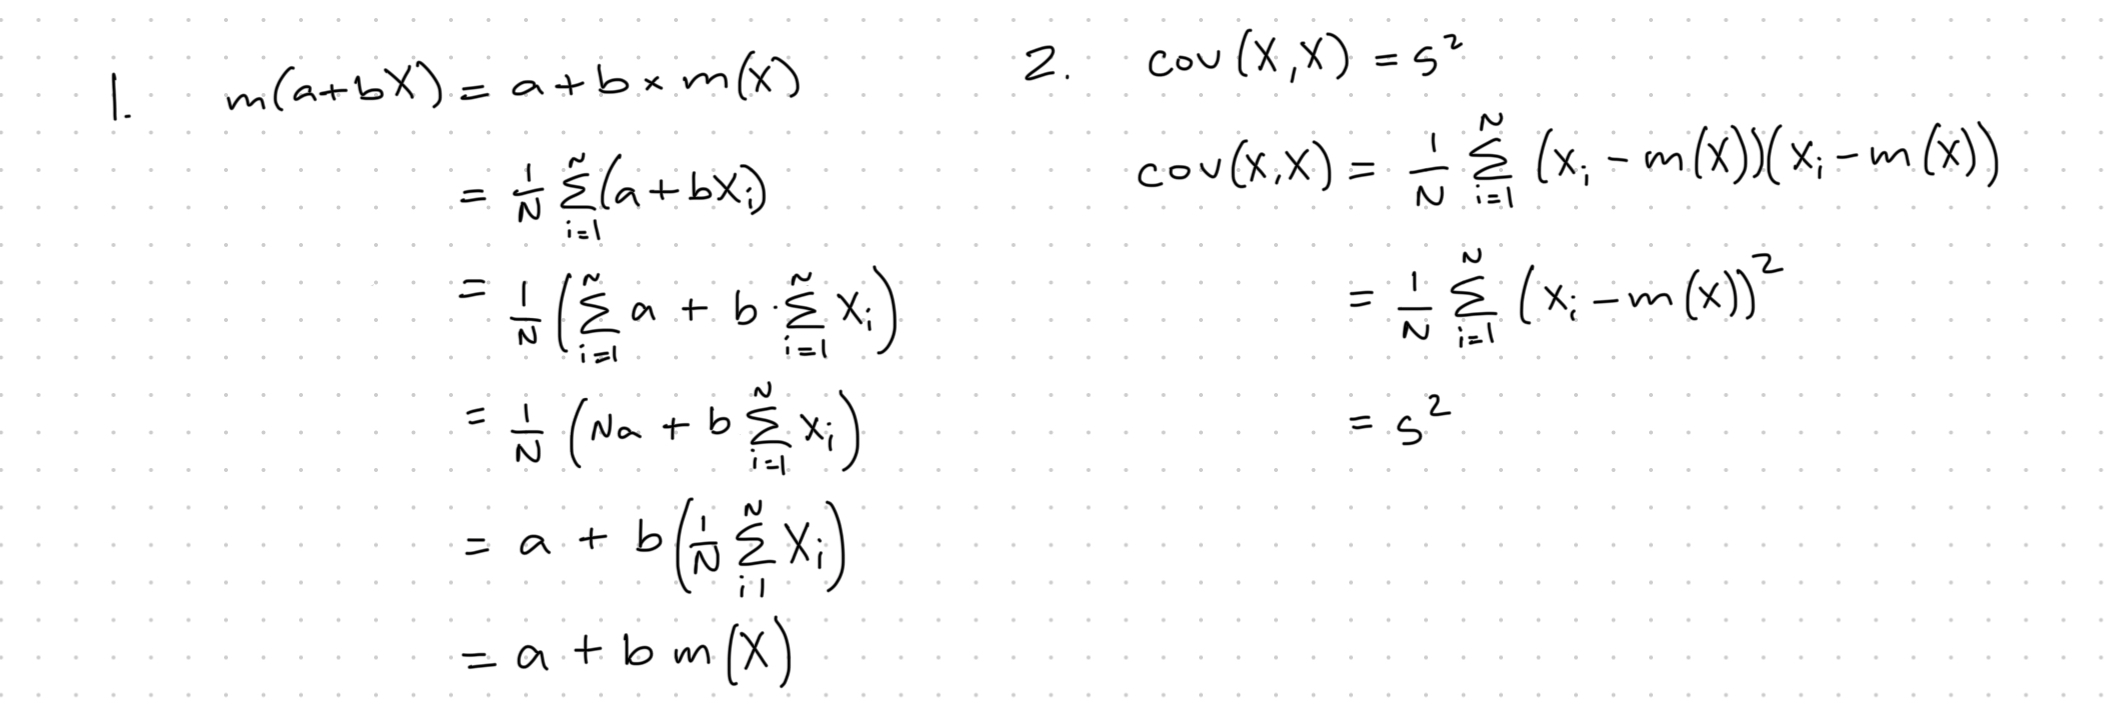

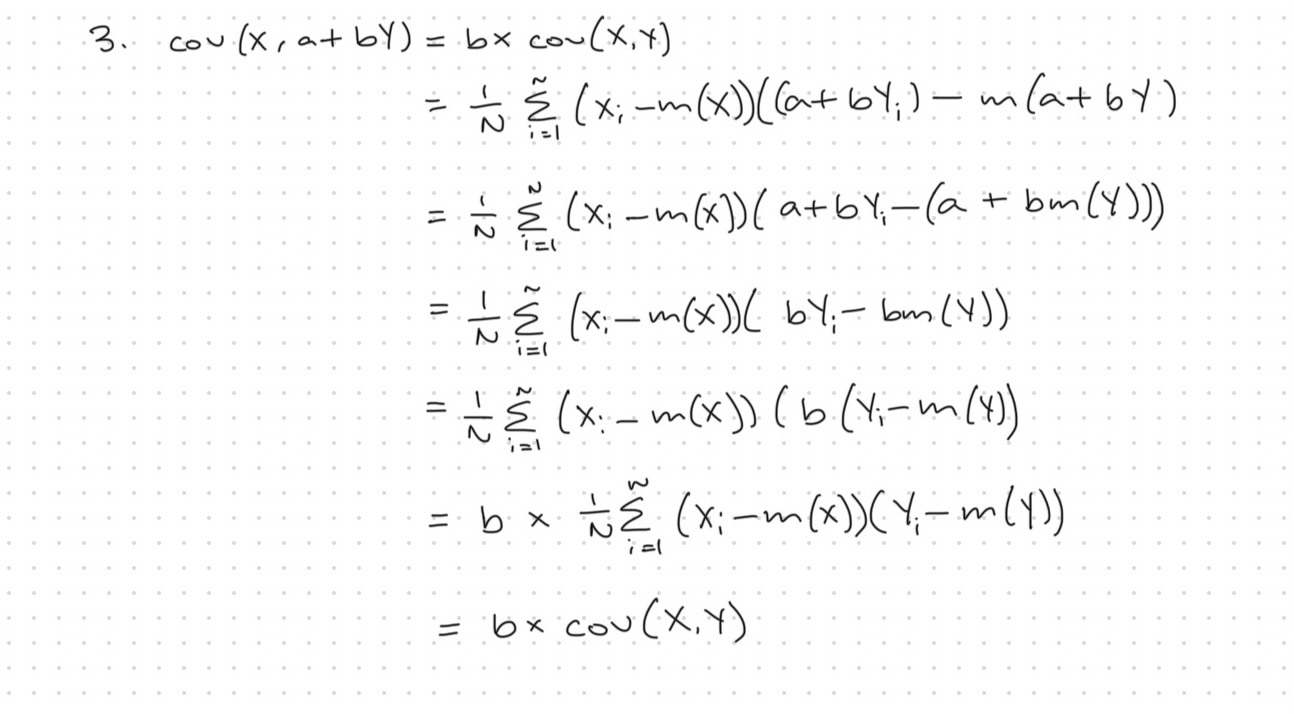

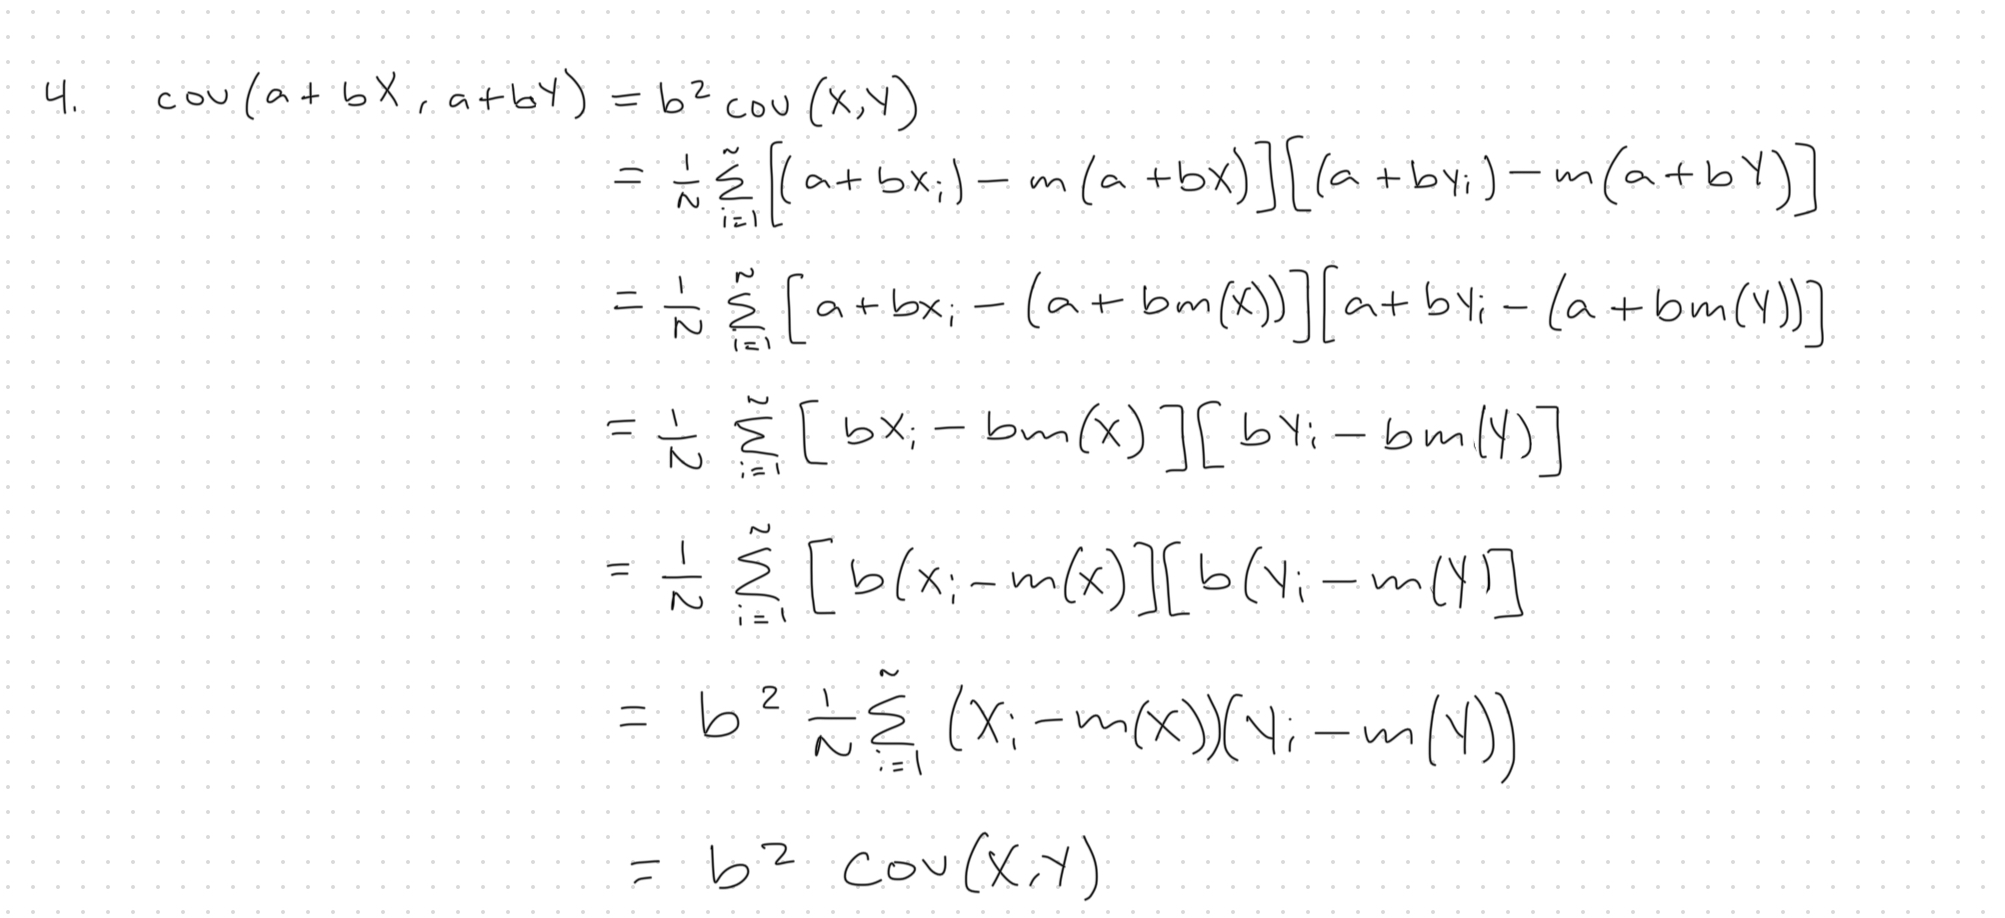

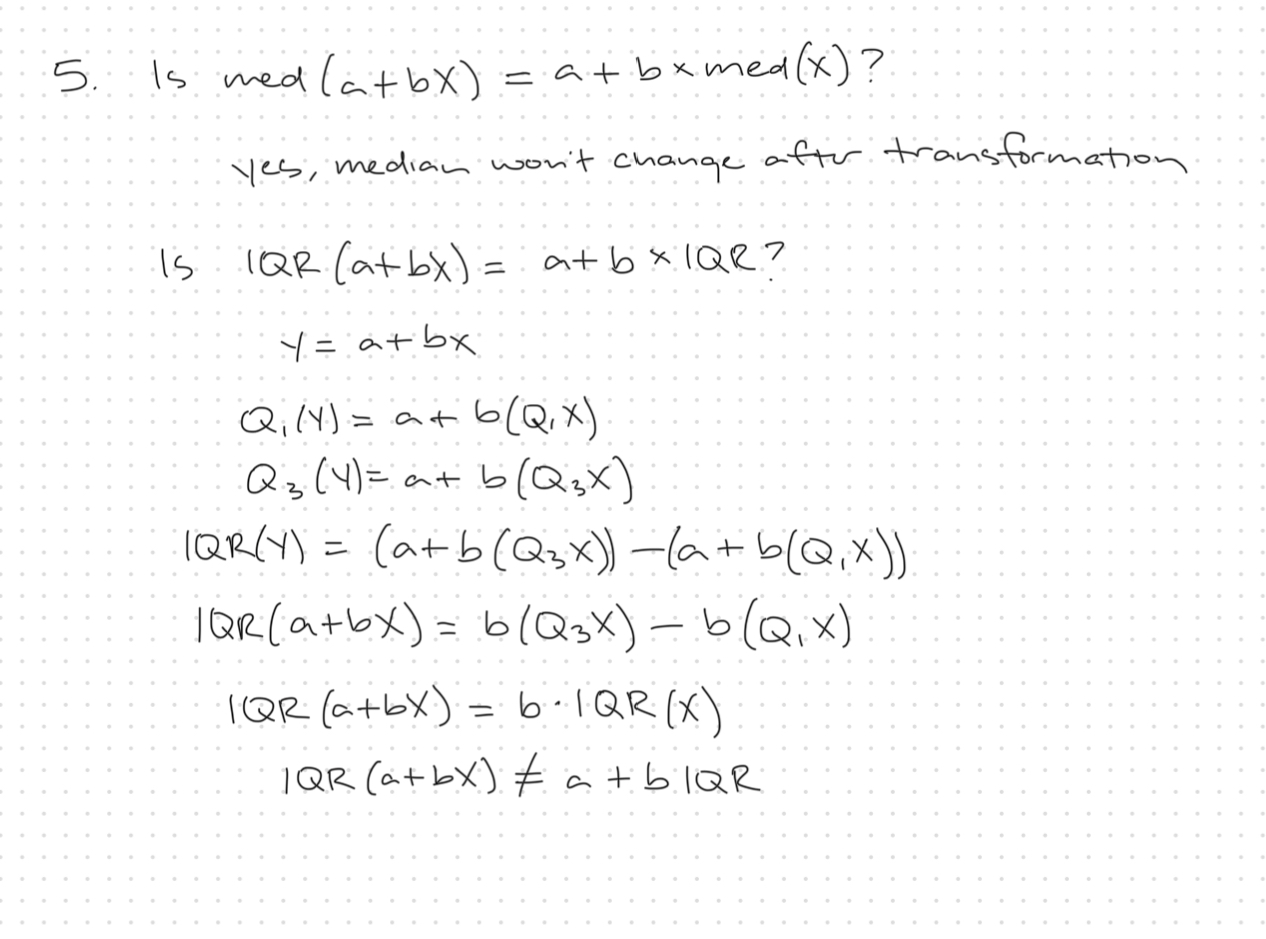

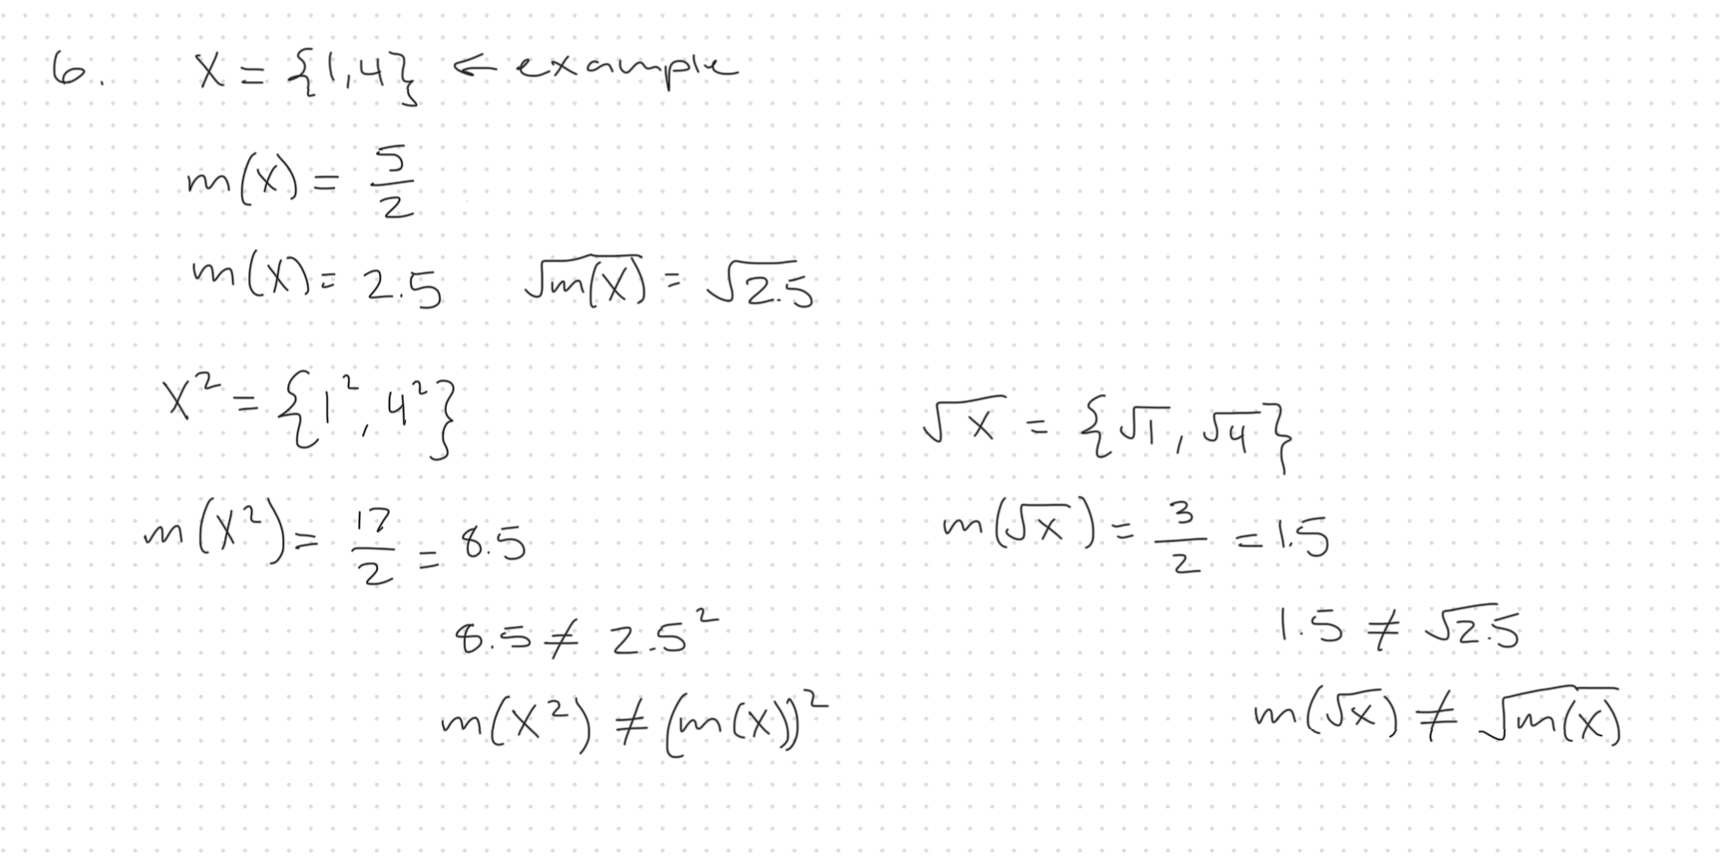

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [24]:
# 1 ) load
ames = pd.read_csv('/content/data/ames_prices.csv')
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


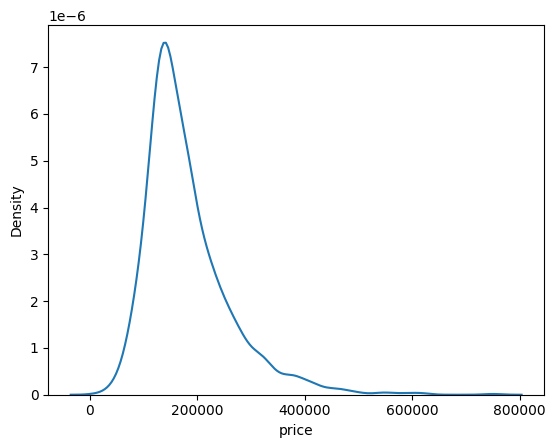

In [26]:
# 2 ) kde price
sns.kdeplot(ames['price'])
ames['price'].describe()

price                                                            \
            count           mean           std      min       25%       50%   
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                               
                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0

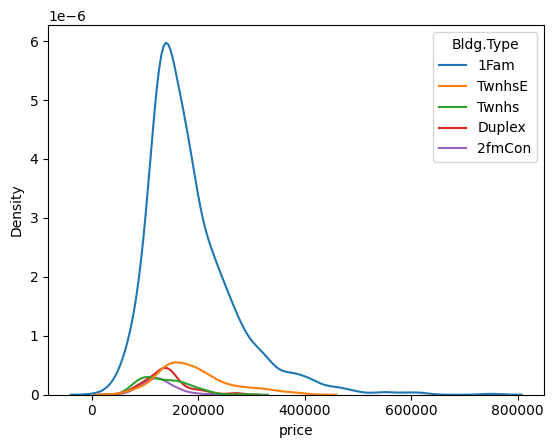

In [27]:
# 2 ) kde price w bldg type
sns.kdeplot(x=ames['price'], hue= ames['Bldg.Type'])
ames.loc[:, ['price', 'Bldg.Type']].groupby('Bldg.Type').describe()

# Townhouses have the largest mean/median price but 1fam has the largest spread and variation

array([ 12789., 129500., 160000., 213500., 755000.])

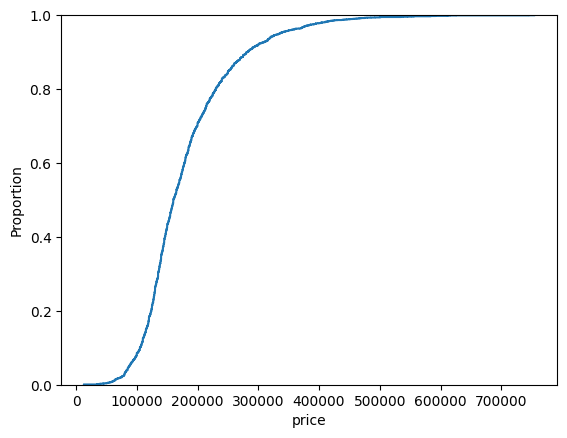

In [29]:
# 3 ) ecdf plot
sns.ecdfplot(ames['price'])

np.quantile(ames['price'], [0, .25, .5, .75, 1]) # 5 number summary


<Axes: xlabel='price'>

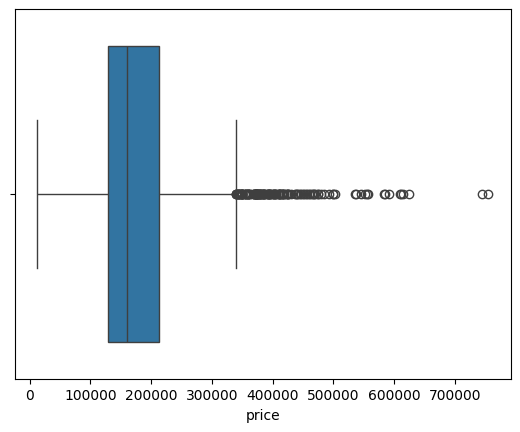

In [30]:
# 4 ) price boxplot
sns.boxplot(x=ames['price'])

# There are many outliers

<Axes: xlabel='Bldg.Type', ylabel='price'>

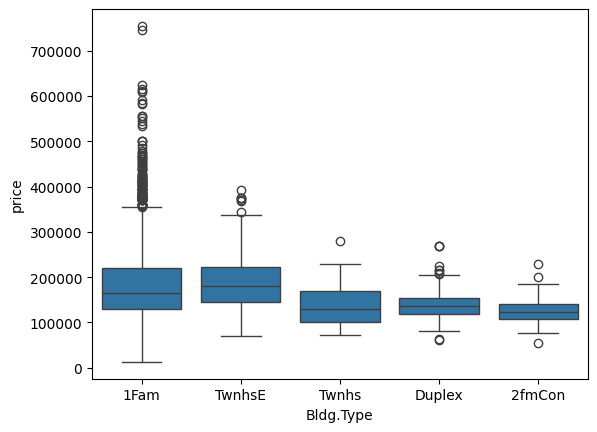

In [31]:
# 4 ) price boxplot w bldg type
sns.boxplot(x=ames['Bldg.Type'], y=ames['price'])

# Communicates same pattern as the kde plot, but more clearly. All bldg types have relatively similar
# medians but varying amounts of spread. 1Fam has the most spread with a heavy positive skew.

In [33]:
# 5 )

x = ames['price']

def outlier_analyze(x):
  q75 = np.quantile(x, .75)
  q25 = np.quantile(x, .25)
  iqr = q75 - q25
  upper_whisker = q75 + 1.5*iqr
  lower_whisker = q25 - 1.5*iqr
  upper_outlier = (x > upper_whisker).astype(int)
  lower_outlier = (x < lower_whisker).astype(int)

  outlier = upper_outlier + lower_outlier
  winsorize = (
      upper_outlier * upper_whisker + # map upper outlier to upper whisker
      lower_outlier * lower_whisker + # map lower outliers to lower whisker
      (1 - outlier) * x # if neither, keep original value
  )
  return outlier, winsorize

outlier, winsorize = outlier_analyze(x)

In [39]:
outlier.value_counts() # outlier indicates if an observation is an outlier

,count
price,
0,2793
1,137


In [34]:
winsorize

,price
0,215000.0
1,105000.0
2,172000.0
3,244000.0
4,189900.0
...,...
2925,142500.0
2926,131000.0
2927,132000.0
2928,170000.0


,price
count,2930.000000
mean,177082.283959
std,67906.837135
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,339500.000000


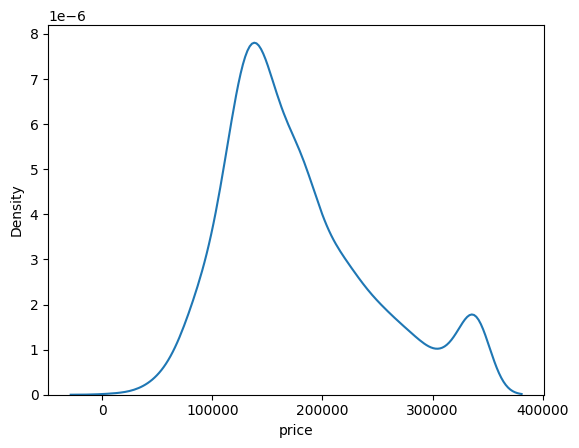

In [37]:
# 6 ) new kdeplot
sns.kdeplot(winsorize)
winsorize.describe()
# The right tail has decreased significantly and the max now reflects the upper whisker
# instead of the highest outlier. The standard dev has decreased a bit too.
